In [ ]:
# Packages
import pandas as pd
from scipy.io import arff
import pandas as pd
import numpy as np

#pip install minisom

URV                                                                            MESIIA

Neural and Evolutionary Computation (NEC)
Assignment 3: Unsupervised learning with PCA, t-SNE, k-means, AHC and SOM

Teachers: Dr. Jordi Duch, Dr. Sergio Gomez

Student: Natzaret Gálvez Rísquez

Part 1: Selecting and analyzing the datasets

The unsupervised learning techniques must be applied on two datasets:

In [ ]:
# We upload the datasets

# First dataset: File: A3-data.txt
    # Features: 4 variables, 1 class
    # Patterns: 360 patterns
data = pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A3/A3-data.txt', sep=',', header=None)
header_vector_data = data.iloc[0, :].tolist() #header
df_data = pd.DataFrame(data.iloc[1:, :-1])
class_data = pd.DataFrame(data.iloc[1:, -1])

# Second dataset: from "https://www.openml.org/search?type=data&status=active&id=188"
    # Features: at least 6 variables, and a class attribute
    # The class attribute must refer to, at least, 4 different classes
    #  Patterns: at least 200 patterns
data_Eucaliptus, meta = arff.loadarff('C:/Users/Gari/Desktop/Assignments_NEC/A3/dataset_194_eucalyptus.arff')
# Convert numpy array to DataFrame
# [736 rows x 20 columns], number of classes 5
dataframe_Eucaliptus = pd.DataFrame(data_Eucaliptus)
df_Eucaliptus = dataframe_Eucaliptus.iloc[:, :-1]
class_eucaliptus = dataframe_Eucaliptus.iloc[:, -1]

In [ ]:
print(meta) # Details of the second dataset

In [ ]:
print(dataframe_Eucaliptus) # Details of the second dataset

Part 2: Comparing unsupervised learning algorithms

We are going to perform unsupervised learning of the two datasets using the following algorithms:
PCA, t-SNE, k-means, AHC and SOM

In [ ]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def apply_pca(data, labels, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)

    # Scatter plot of the first two principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Projection')
    plt.colorbar()
    plt.show()

    # Scree plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.grid(True)
    plt.show()

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

def apply_tsne(data, labels, perplexity=30):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.colorbar()
    plt.show()

In [ ]:
# k-means
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def apply_kmeans(data, labels, k):
# Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(scaled_data)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_data)
    
    # Scatter plot of the data colored according to the true classes
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('True Classes')
    plt.colorbar()
    plt.show()
    
    # Scatter plot of the data colored according to the clusters obtained by K-means
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering (k={k})')
    plt.colorbar()
    plt.show()
    
    # Compare with the real class labels
    if k == len(np.unique(labels)):
        cm = confusion_matrix(labels, cluster_labels)
        print("Confusion Matrix:")
        print(cm)

In [ ]:
# AHC
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Method UPGMA -> method average
def apply_ahc(data, labels, method='average'):
    # Calculate Euclidean distances between original patterns
    data_numeric = data.apply(pd.to_numeric)

    # Calculate linkage matrix
    linkage_matrix = linkage(data_numeric, method=method)

    # Plot dendrogram with colors representing original classes
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, 
               color_threshold=0, 
               labels=labels,
               leaf_font_size=10,
               above_threshold_color='k')
    plt.title(f'Agglomerative Hierarchical Clustering ({method.capitalize()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

In [77]:
# SOM
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

def apply_som(data, labels, mapsize=(10, 10), topology='rectangular', learning_rate=0.02, neighborhood_function='gaussian'):
    # Ensure at least 100 neurons
    if mapsize[0] * mapsize[1] < 100:
        raise ValueError("Number of neurons is less than 100. Please choose a larger mapsize.")

    # Convert DataFrame to numpy array
    data_array = data.to_numpy()

    # Normalize the data
    data_normalized = (data_array - data_array.min(axis=0)) / (data_array.max(axis=0) - data_array.min(axis=0))

    # Train the SOM
    som = MiniSom(mapsize[0], mapsize[1], data_array.shape[1], sigma=0.3, learning_rate=learning_rate, topology=topology, neighborhood_function=neighborhood_function)
    som.train_random(data_normalized, 100)

    # Plot component planes
    plt.figure(figsize=(12, 8))
    plt.suptitle('Component Planes')
    for i in range(data.shape[1]):  # Loop over the number of features
        plt.subplot(1, len(data), i+1)
        plt.title(f'Feature {i+1}')
        plt.pcolor(som.get_weights()[:, :, i].T, cmap='viridis')  # Modify this line
        plt.colorbar()
    plt.show()

    # Plot U-matrix
    plt.figure(figsize=(10, 8))
    umatrix = som.distance_map()
    plt.pcolor(umatrix, cmap='viridis')
    plt.colorbar()
    plt.title('U-matrix')
    plt.show()

    # Find the best matching units (BMUs) for each data point
    bmus = np.array([som.winner(x) for x in data])

    # Calculate the most represented class for each position
    most_represented_class = np.zeros(som.get_weights().shape[:2])
    for i, j in np.ndindex(som.get_weights().shape[:2]):
        indices = np.where(np.all(bmus == (i, j), axis=1))
        if len(indices[0]) > 0:
            most_represented_class[i, j] = np.argmax(np.bincount(labels[indices].astype(int)))

    # Plot heatmap of the most represented class in each position
    plt.figure(figsize=(10, 8))
    plt.imshow(most_represented_class, cmap='viridis')
    plt.colorbar(label='Class')
    plt.title('Heatmap of the Most Represented Class')
    plt.show()


Dataset 1: data

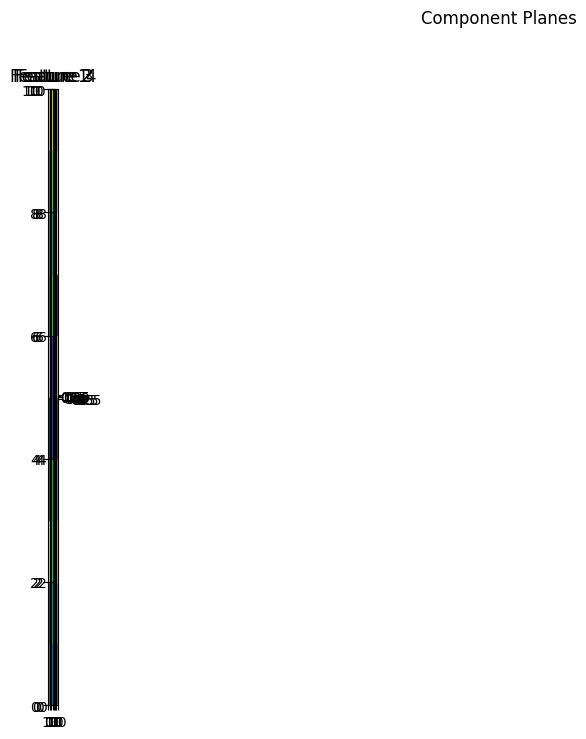

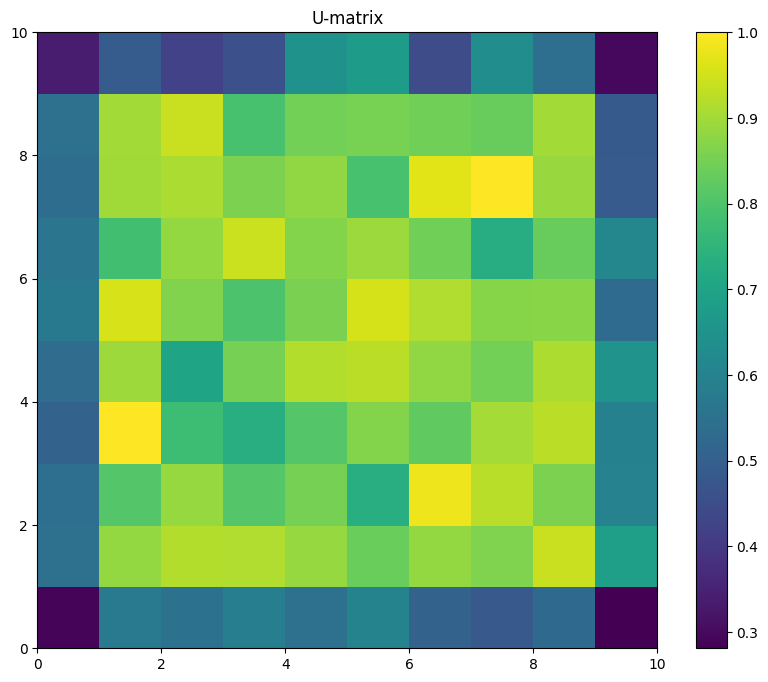

UnboundLocalError: cannot access local variable 'indices' where it is not associated with a value

In [76]:
labels = class_data.values
labelsKmeans = labels.flatten()
data_array = df_data.to_numpy()
#apply_pca(df_data, labels)
#apply_tsne(df_data, labels)
#apply_ahc(df_data, labels)
#apply_kmeans(data_array, labelsKmeans.astype(int), k=6)

numeric_data = df_data.apply(pd.to_numeric)
apply_som(numeric_data, labels)

Dataset 2: eucaliptus

In [ ]:
labels = class_eucaliptus

apply_pca(df_Eucaliptus, labels)
apply_tsne(df_Eucaliptus, labels)
apply_kmeans(df_Eucaliptus, labels, k=5)
apply_ahc(df_Eucaliptus)
apply_som(df_Eucaliptus, labels)